In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
import networkx as nx
from collections import defaultdict

# Load Data
df_w1 = pd.read_csv('../Cooked/df_w1_prepared.csv')
df_w2 = pd.read_csv('../Cooked/df_w2_prepared.csv') 
df_w3 = pd.read_csv('../Cooked/df_w3_prepared.csv')

G_1 = nx.read_gml("../NA/multiplex_graph_w1.gml")
G_2 = nx.read_gml("../NA/multiplex_graph_w2.gml")
G_3 = nx.read_gml("../NA/multiplex_graph_w3.gml")

In [57]:
# Rename columns before merging to indicate their source
df1_renamed = df_w1.rename(columns=lambda col: f"{col}_df1" if col != 'participant.label' else col)
df2_renamed = df_w2.rename(columns=lambda col: f"{col}_df2" if col != 'participant.label' else col)
df3_renamed = df_w3.rename(columns=lambda col: f"{col}_df3" if col != 'participant.label' else col)

# Perform the merge (no suffixes needed)
merged = df1_renamed.merge(df2_renamed, on='participant.label', how='outer') \
                    .merge(df3_renamed, on='participant.label', how='outer')

# Reorder columns: keep 'participant.label' first, then sort the rest alphabetically
cols = ['participant.label'] + sorted([col for col in merged.columns if col != 'participant.label'])
merged = merged[cols]

In [58]:
merged

,participant.label,conjoint_app.1.player.browser_df1,conjoint_app.1.player.browser_df2,conjoint_app.1.player.browser_df3,conjoint_app.1.player.device_type_df1,conjoint_app.1.player.device_type_df2,conjoint_app.1.player.device_type_df3,conjoint_app.1.player.lang_df1,conjoint_app.1.player.lang_df2,conjoint_app.1.player.lang_df3,...,political_app.1.player.sunday_party_vote_df3,politics_question_index_df1,politics_question_index_df2,politics_question_index_df3,right_party_scalo_index_df1,right_party_scalo_index_df2,right_party_scalo_index_df3,rightwing_opposition_scalo_index_df1,rightwing_opposition_scalo_index_df2,rightwing_opposition_scalo_index_df3
0,39b,3.0,3.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,...,3.0,4.000000,3.571429,3.857143,-3.50,-3.50,-2.50,-4.25,-4.50,-3.75
1,3ab,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,...,3.0,4.000000,4.571429,3.857143,-2.25,-3.50,-3.25,-3.50,-4.25,-4.00
2,3eh,5.0,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,...,3.0,4.142857,3.857143,4.142857,-3.50,-3.75,-3.00,-4.00,-3.75,-3.75
3,3fv,3.0,3.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,...,3.0,4.000000,3.714286,4.000000,-0.50,-1.75,-1.75,-3.50,-3.75,-3.75
4,3hc,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,...,3.0,4.142857,4.000000,4.571429,-0.50,-2.75,-1.00,-2.50,-3.50,-3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,yte,3.0,3.0,NaN,3.0,3.0,NaN,0.0,0.0,NaN,...,NaN,3.857143,4.285714,NaN,-1.50,-0.75,NaN,-3.50,-3.25,NaN
194,ytr,3.0,3.0,3.0,3.0,2.0,2.0,0.0,1.0,1.0,...,6.0,3.428571,3.142857,3.285714,0.50,0.50,1.00,1.00,-0.75,0.00
195,yuc,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,...,0.0,3.142857,3.285714,3.142857,-3.25,-3.00,-2.50,-3.50,-2.75,-2.50
196,ywc,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,...,3.0,3.428571,4.428571,4.000000,-2.50,-3.00,-3.50,-4.50,-4.50,-4.25


In [32]:
columns_base = ['conjoint_app.1.player.lang',
                'demographic_app.1.player.age',
                'demographic_app.1.player.consecutive_study_program']  # list of base column names

for col in columns_base:
    df1 = f'{col}_df1'
    df2 = f'{col}_df2'
    df3 = f'{col}_df3'

    if df1 in merged.columns and df3 in merged.columns:
        merged[df1] = merged[df1].combine_first(merged[df3])
    if df1 in merged.columns and df2 in merged.columns:
        merged[df1] = merged[df1].combine_first(merged[df2])

    if df2 in merged.columns and df3 in merged.columns:
        merged[df2] = merged[df2].combine_first(merged[df3])
    if df2 in merged.columns and df1 in merged.columns:
        merged[df2] = merged[df2].combine_first(merged[df1])

    if df3 in merged.columns and df1 in merged.columns:
        merged[df3] = merged[df3].combine_first(merged[df1])
    if df3 in merged.columns and df2 in merged.columns:
        merged[df3] = merged[df3].combine_first(merged[df2])

In [33]:
merged

,participant.label,conjoint_app.1.player.browser_df1,conjoint_app.1.player.browser_df2,conjoint_app.1.player.browser_df3,conjoint_app.1.player.device_type_df1,conjoint_app.1.player.device_type_df2,conjoint_app.1.player.device_type_df3,conjoint_app.1.player.lang_df1,conjoint_app.1.player.lang_df2,conjoint_app.1.player.lang_df3,...,political_app.1.player.sunday_not_eligible_df3,political_app.1.player.sunday_party_vote_df1,political_app.1.player.sunday_party_vote_df2,political_app.1.player.sunday_party_vote_df3,political_app.1.player.sunday_poll_df1,political_app.1.player.sunday_poll_df2,political_app.1.player.sunday_poll_df3,politics_question_index_df1,politics_question_index_df2,politics_question_index_df3
0,39b,3.0,3.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,...,NaN,3.0,3.0,3.0,1.0,1.0,1.0,4.000000,3.571429,3.857143
1,3ab,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,...,NaN,1.0,3.0,3.0,1.0,1.0,1.0,4.000000,4.571429,3.857143
2,3eh,5.0,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,...,NaN,1.0,3.0,3.0,1.0,1.0,1.0,4.142857,3.857143,4.142857
3,3fv,3.0,3.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,...,NaN,3.0,3.0,3.0,1.0,1.0,1.0,4.000000,3.714286,4.000000
4,3hc,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,...,NaN,3.0,3.0,3.0,1.0,1.0,1.0,4.142857,4.000000,4.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,yte,3.0,3.0,NaN,3.0,3.0,NaN,0.0,0.0,0.0,...,NaN,1.0,1.0,NaN,1.0,1.0,NaN,3.857143,4.285714,NaN
194,ytr,3.0,3.0,3.0,3.0,2.0,2.0,0.0,1.0,1.0,...,NaN,6.0,6.0,6.0,1.0,1.0,1.0,3.428571,3.142857,3.285714
195,yuc,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,...,NaN,3.0,8.0,NaN,1.0,1.0,2.0,3.142857,3.285714,3.142857
196,ywc,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,...,NaN,NaN,3.0,3.0,NaN,1.0,1.0,3.428571,4.428571,4.000000


In [34]:
import pandas as pd
import networkx as nx

def create_focused_edges_dataframe(graphs, relations, attribute_weighted="leftright", node_attributes=None):
    if node_attributes is None:
        node_attributes = ["linksrechts_self"]
    
    if "leftright" not in relations:
        relations.append("leftright")
    
    all_edges = []
    
    for time_idx, G in enumerate(graphs, 1):
        # First pass: only process leftright edges
        leftright_edges = [
            (u, v, k) for u, v, k, d in G.edges(data=True, keys=True)
            if k == "leftright"
        ]
        
        if not leftright_edges:
            continue
            
        filtered_graph = G.edge_subgraph(leftright_edges).copy()
        
        for u, v, d in filtered_graph.edges(data=True):
            edge_entry = {
                "time": time_idx,
                "i": u,
                "j": v,
                "linksrechts_perceived_ij": d.get("weight", None),
            }
            
            # Add node attributes only for leftright edges
            for attr in node_attributes:
                edge_entry[f"{attr}_i"] = filtered_graph.nodes[u].get(attr)
                edge_entry[f"{attr}_j"] = filtered_graph.nodes[v].get(attr)
            
            # Second pass: check for other relations between these nodes
            for rel in relations:
                if rel == "leftright":
                    continue
                
                # Check if this relation exists between the nodes
                if G.has_edge(u, v, key=rel):
                    rel_data = G.edges[u, v, rel]
                    edge_entry[rel] = True
                else:
                    edge_entry[rel] = False
            
            all_edges.append(edge_entry)
    
    # Create DataFrame
    df = pd.DataFrame(all_edges)
    
    # Reorder columns for better readability
    base_cols = ["time", "i", "j", "linksrechts_perceived_ij"]
    node_cols = [f"{attr}_i" for attr in node_attributes] + [f"{attr}_j" for attr in node_attributes]
    rel_cols = [rel for rel in relations if rel != "leftright"]
    
    return df[base_cols + node_cols + rel_cols]


In [54]:
relations = ["aquaintance", "leftright", "politics", "council", "study", "friend", "value"]
graphs = [G_1, G_2, G_3]
node_attributes = ["grade", "gender", "linksrechts_self", "age"]

total_edges_df = create_focused_edges_dataframe(
    graphs=graphs,
    relations=relations,
    attribute_weighted="leftright",
    node_attributes=node_attributes
)

In [36]:
# total_edges_df["delta_linksrechts_i_ij"] = total_edges_df["linksrechts_self_i"] - total_edges_df["linksrechts_perceived_ij"]
# total_edges_df["delta_linksrechts_i_j"] = total_edges_df["linksrechts_self_i"] - total_edges_df["linksrechts_self_j"]

<Axes: >

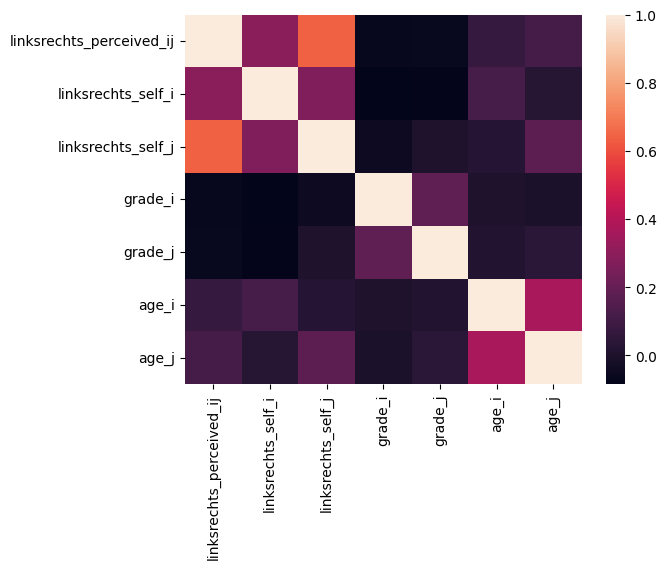

In [55]:
correlation_matrix = total_edges_df[["linksrechts_perceived_ij", "linksrechts_self_i", "linksrechts_self_j", "grade_i", "grade_j", "age_i", "age_j"]].corr()
sns.heatmap(correlation_matrix)